In [41]:
import keras
import keras.backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split

In [42]:
num_classes = 10
img_rows, img_cols = 28, 28
image_size = 28

In [43]:
def load_data():    
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test .reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /=255
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return x_train,  x_test, y_train, y_test

In [44]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [45]:
def create_model():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 1)))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
        
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    return model

In [46]:
x_train,  x_test, y_train, y_test = load_data()

model = create_model()

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 140s 2ms/step - loss: 1.2440 - accuracy: 0.5658 - val_loss: 0.6774 - val_accuracy: 0.7686
Epoch 2/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.6812 - accuracy: 0.7554 - val_loss: 0.6565 - val_accuracy: 0.7687
Epoch 3/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.5907 - accuracy: 0.7851 - val_loss: 0.5286 - val_accuracy: 0.8144
Epoch 4/50
60000/60000 [==============================] - 140s 2ms/step - loss: 0.5412 - accuracy: 0.8058 - val_loss: 0.4898 - val_accuracy: 0.8250
Epoch 5/50
60000/60000 [==============================] - 140s 2ms/step - loss: 0.4998 - accuracy: 0.8226 - val_loss: 0.4748 - val_accuracy: 0.8270
Epoch 6/50
60000/60000 [==============================] - 260s 4ms/step - loss: 0.4714 - accuracy: 0.8327 - val_loss: 0.4416 - val_accuracy: 0.8447
Epoch 7/50
60000/60000 [==============================] - 138s

In [47]:
plot_history(history)

KeyError: 'acc'

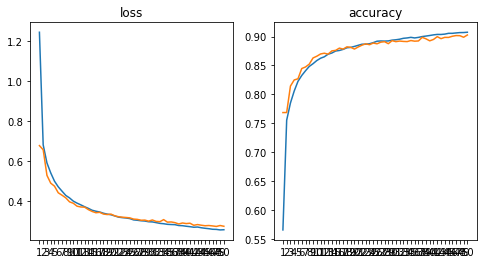

In [59]:
import matplotlib.pyplot as plt
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(8, 4))

epochs = np.arange(1, len(history.history['loss']) + 1)

# 各エポックの誤差の推移
axes1.set_title('loss')
axes1.plot(epochs, history.history['loss'], label='train')
axes1.plot(epochs, history.history['val_loss'], label='validation')
axes1.set_xticks(epochs)

# 各エポックの精度の推移
axes2.set_title('accuracy')
axes2.plot(epochs, history.history['accuracy'], label='train')
axes2.plot(epochs, history.history['val_accuracy'], label='validation')
axes2.set_xticks(epochs)

plt.show()